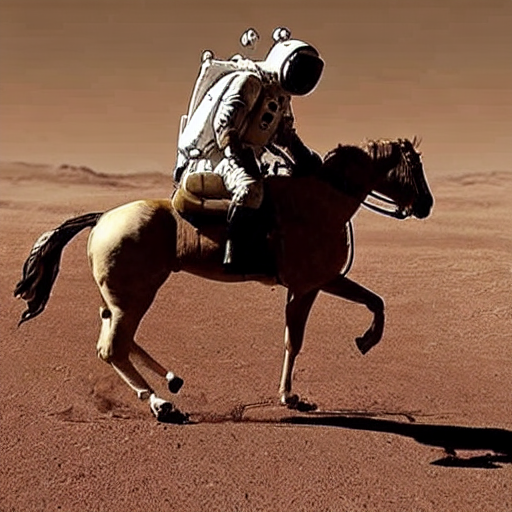

In [9]:
image

In [ ]:
!pip install --upgrade diffusers transformers scipy
from diffusers import StableDiffusionPipeline
import torch
model_id = "runwayml/stable-diffusion-v1-5"

In [121]:
import diffusers
schedulers ={"LMSDiscrete": diffusers.schedulers.scheduling_lms_discrete.LMSDiscreteScheduler,"DDIM": diffusers.schedulers.scheduling_ddim.DDIMScheduler,
     "DPMSolverMultistep": diffusers.schedulers.scheduling_dpmsolver_multistep.DPMSolverMultistepScheduler,"EulerDiscrete": diffusers.schedulers.scheduling_euler_discrete.EulerDiscreteScheduler,
     "PNDM": diffusers.schedulers.scheduling_pndm.PNDMScheduler,"DDPM": diffusers.schedulers.scheduling_ddpm.DDPMScheduler,
     "EulerAncestralDiscrete": diffusers.schedulers.scheduling_euler_ancestral_discrete.EulerAncestralDiscreteScheduler}

def load_scheduler(scheduler):
  return list(scheduler.keys())


In [134]:
pipe = DiffusionPipeline.from_pretrained(model_id, scheduler=scheduler,revision="fp16", torch_dtype=torch.float16)

unet/diffusion_pytorch_model.safetensors not found


Fetching 14 files:   0%|          | 0/14 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [124]:
def inference(prompt,negative_prompt,scheduler_name, num_inf_steps, guidance_scale):
  scheduler = schedulers[scheduler_name]
  scheduler = scheduler.from_pretrained(model_id, subfolder="scheduler")
  #pipe = DiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, use_safetensors=True,revision="fp16", torch_dtype=torch.float16)
  pipe = pipe.to("cuda")
  return pipe(prompt = prompt , negative_prompt = negative_prompt,num_inference_steps = num_inf_steps,  guidance_scale= guidance_scale).images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/30 [00:00<?, ?it/s]

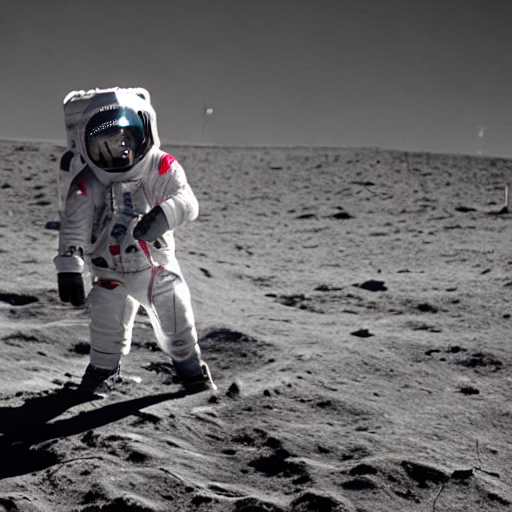

In [125]:
inference('astro',"",'PNDM',30,7.5)

In [126]:
import gradio as gr

In [130]:
interface = gr.Interface(
    fn=inference,
    inputs=[
        gr.inputs.Textbox(label="Enter a Prompt"),
        gr.inputs.Textbox(label="Enter a Negative Prompt"),
        gr.Dropdown(
            load_scheduler(schedulers), label="Schedulers"
        ),
        gr.Slider(1, 100, value=50,step = 1, label="Sampling Steps"),
        gr.Slider(1, 15, value=7.5, label="Guidance Scale")
    ],
    outputs='image'
)

# Launch the interface on a local server
interface.launch()

<ipython-input-130-e819565f99bc>:4: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Textbox(label="Enter a Prompt"),
<ipython-input-130-e819565f99bc>:4: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Textbox(label="Enter a Prompt"),
<ipython-input-130-e819565f99bc>:4: GradioDeprecationWarning: `numeric` parameter is deprecated, and it has no effect
  gr.inputs.Textbox(label="Enter a Prompt"),
<ipython-input-130-e819565f99bc>:5: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Textbox(label="Enter a Negative Prompt"),
<ipython-input-130-e819565f99bc>:5: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Textbox(label="Enter a Negative Prompt"),
<ipython-input-

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>